In this assignment you can identify a dataset of your interest and perform exploratory data analysis to better understand the data, investigate initial questions about it and develop preliminary insights and hypotheses. Your final submission will be a blog post consisting of a series of captioned visualizations that convey the key insights gained over the course of your analysis. You need to post the blog to medium or your github website.

Documenting the data analysis process you went through is the main pedagogical goal of the assignment and more important than the design of the final visualization.

We will go over the details of the project during class hours next week.

##**Part 1: Select and Prepare the Data**

Copy of the dataset is available at: 
https://drive.google.com/file/d/1XX0NLmIwbgoRcdfhWOXP2bQlzHTqKNIe/view?usp=sharing

Blog post of the EDA project report can be found at: https://zihengpa.medium.com/eda-project-report-f7ae646f8d92


The data are from the video game FIFA 21 and reflect comtemporary world soccer player stats. My data analysis mainly serves to offer insights into top players/teams and make suggestions for games to construct a powerful line-up. 
Some questions I would like to explore:
1. Top 10 players by each position
2. Top clubs sorted by average player abilities 
3. Top national teams sorted by average player abilities
4. Whether and how a player's potential is correlated with age


In [2]:
# import libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_handle = drive.CreateFile({'id': '1XX0NLmIwbgoRcdfhWOXP2bQlzHTqKNIe'})
file_handle.GetContentFile('FIFA-21 Complete.csv')


## **Part 2: Exploratory Analysis**

Once you have picked the dataset and performed the initial data wrangling, you will perform exploratory analysis to investigate your data. For this assignment we would like you to use Pandas, NumPy and matplotlib to help you with the analysis. 

**Phase 1:** You should start the exploration by first examining the shape and structure of your data. What dimensions/variables does it contain and how are the data values distributed? Are there any notable data quality issues? Find out if there are missing values in the data and think of how you can handle them. Are there any surprising relationships between the dimensions/variables? Make sure to perform sanity checks for patterns you expect to see! Note that it may be the case that after doing a bit of exploration in phase 1 you find that your data is not as interesting as you first thought. In such cases you might consider returning to Part 1 and identifying a different dataset to work with. Such iteration on choosing the dataset is common, but also time-consuming, so make sure you leave time in your schedule for this.

**Phase 2:** Next, you should investigate your initial questions, as well as any new questions that arise during your exploration. For each question, create a visualization that might provide a useful answer. Then refine the visualization (by adding additional variables, changing the sort ordering or axis scales, filtering or subsetting data, etc.) to develop better perspectives explore unexpected observations, or sanity check your assumptions. You should repeat this process for each of your questions, and also feel free to revise your questions or branch off to explore new questions as the data warrants.

In [13]:
# store the dataset into a dataframe and display it
df = pd.read_csv('FIFA-21 Complete.csv', sep=";")
print(df)

       player_id               name  ... potential                         team
0         158023       Lionel Messi  ...        94                FC Barcelona 
1          20801  Cristiano Ronaldo  ...        93                    Juventus 
2         190871          Neymar Jr  ...        92         Paris Saint-Germain 
3         203376    Virgil van Dijk  ...        92                   Liverpool 
4         200389          Jan Oblak  ...        93             Atlético Madrid 
...          ...                ...  ...       ...                          ...
17976     256093        Jaime Ortíz  ...        64    Sociedad Deportiva Aucas 
17977     256088   Michael Carcelén  ...        64  Club Deportivo El Nacional 
17978     256074        Davide Luzi  ...        68          Zamora Fútbol Club 
17979     256073    Sergio Sulbarán  ...        62          Zamora Fútbol Club 
17980     256072          Luis Peña  ...        69          Zamora Fútbol Club 

[17981 rows x 9 columns]


In [14]:
# remove lines that have null
df.dropna(0, 'any', inplace=True)
print(df) # no row is removed, so no null values in the data


       player_id               name  ... potential                         team
0         158023       Lionel Messi  ...        94                FC Barcelona 
1          20801  Cristiano Ronaldo  ...        93                    Juventus 
2         190871          Neymar Jr  ...        92         Paris Saint-Germain 
3         203376    Virgil van Dijk  ...        92                   Liverpool 
4         200389          Jan Oblak  ...        93             Atlético Madrid 
...          ...                ...  ...       ...                          ...
17976     256093        Jaime Ortíz  ...        64    Sociedad Deportiva Aucas 
17977     256088   Michael Carcelén  ...        64  Club Deportivo El Nacional 
17978     256074        Davide Luzi  ...        68          Zamora Fútbol Club 
17979     256073    Sergio Sulbarán  ...        62          Zamora Fútbol Club 
17980     256072          Luis Peña  ...        69          Zamora Fútbol Club 

[17981 rows x 9 columns]


In [29]:
# Display players who can play multiple positions (seperated by '|'). 
# This is what we need to pay attention to when conducting analysis by position categories.
df.loc[df.position.str.find("|") > 0]



,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
5,192985,Kevin De Bruyne,Belgium,CM|CAM,91,29,119,91,Manchester City
7,183277,Eden Hazard,Belgium,ST|LW,91,29,66,91,Real Madrid
...,...,...,...,...,...,...,...,...,...
17967,256329,Hassan Al Shamrani,Saudi Arabia,CB|CDM,56,29,0,57,Damac FC
17968,256326,Paulos Abraham,Sweden,RW|LW,56,18,1,71,AIK
17970,256263,Dmitry Markitesov,Russia,CB|RM|LM,56,19,0,75,Spartak Moscow
17971,256170,Samuel Renel,France,RM|CM|CAM,56,18,0,72,Chamois Niortais Football Club


In [139]:
positions_split = df.position.str.split('|', expand=True)
print(positions_split)
all_positions = pd.concat([positions_split[0], positions_split[1], positions_split[2], positions_split[3], positions_split[4]])
# display unique positions
all_positions.unique()

         0     1     2     3     4
0       ST    CF    RW  None  None
1       ST    LW  None  None  None
2      CAM    LW  None  None  None
3       CB  None  None  None  None
4       GK  None  None  None  None
...    ...   ...   ...   ...   ...
17976   ST  None  None  None  None
17977   CM  None  None  None  None
17978   ST  None  None  None  None
17979   RW  None  None  None  None
17980   CM  None  None  None  None

[17981 rows x 5 columns]


array(['ST', 'CAM', 'CB', 'GK', 'CM', 'LW', 'CDM', 'RW', 'CF', 'RB', 'LM',
       'RM', 'LB', 'LWB', 'RWB', None], dtype=object)

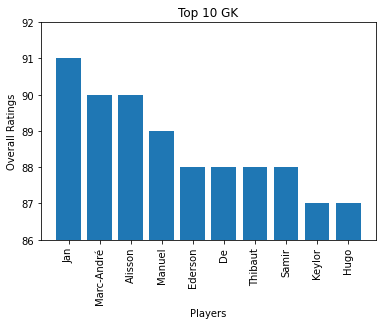

In [92]:
# top 10 goalkeepers
top10_GK = df.loc[df.position.str.contains("GK")].sort_values('overall', ascending=False).head(10)
first_names = top10_GK.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_GK.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 GK')
plt.ylim([86,92])
plt.xticks(rotation=90)
plt.show()


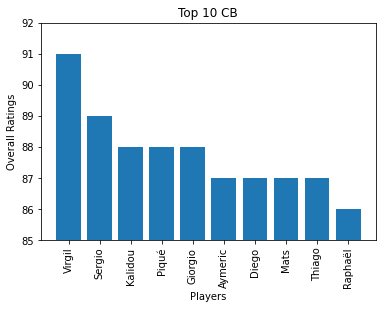

In [142]:
# top 10 center-backs
top10_CB = df.loc[df.position.str.contains("CB")].sort_values('overall', ascending=False).head(10)
first_names = top10_CB.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_CB.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 CB')
plt.ylim([85,92])
plt.xticks(rotation=90)
plt.show()

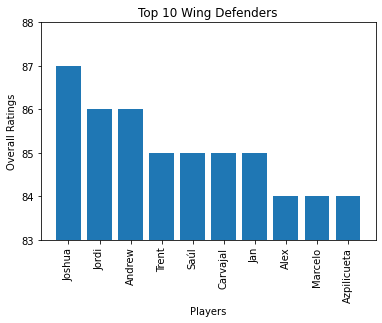

In [94]:
# top 10 wing defenders (including LB, RB, LWB, RWB)
top10_wing_defender = df.loc[df.position.str.contains("LB|RB|LWB|RWB")].sort_values('overall', ascending=False).head(10)
first_names = top10_wing_defender.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_wing_defender.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 Wing Defenders')
plt.ylim([83,88])
plt.xticks(rotation=90)
plt.show()


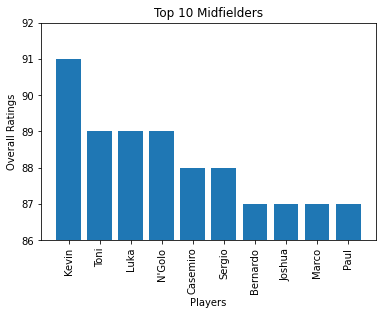

In [99]:
# top 10 midfielders (including CM, CDM)
top10_wing_midfielders = df.loc[df.position.str.contains("CM|CDM")].sort_values('overall', ascending=False).head(10)
first_names = top10_wing_midfielders.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_wing_midfielders.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 Midfielders')
plt.ylim([86,92])
plt.xticks(rotation=90)
plt.show()


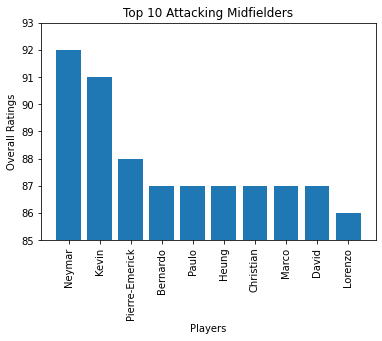

In [102]:
# top 10 attacking midfielders (including CAM, LM, RM)
top10_attck_midfielders = df.loc[df.position.str.contains("CAM|LM|RM")].sort_values('overall', ascending=False).head(10)
first_names = top10_attck_midfielders.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_attck_midfielders.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 Attacking Midfielders')
plt.ylim([85,93])
plt.xticks(rotation=90)
plt.show()

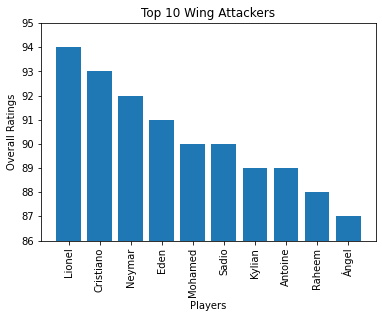

In [144]:
# top 10 wing attackers (including LW, RW)
top10_wing_attackers = df.loc[df.position.str.contains("LW|RW")].sort_values('overall', ascending=False).head(10)
first_names = top10_wing_attackers.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_wing_attackers.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 Wing Attackers')
plt.ylim([86,95])
plt.xticks(rotation=90)
plt.show()

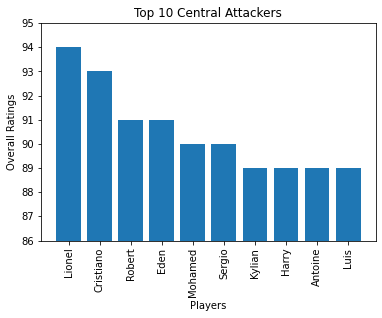

In [149]:
# top 10 central attackers (including ST, CF)
top10_center_attackers = df.loc[df.position.str.contains("CF|ST")].sort_values('overall', ascending=False).head(10)
first_names = top10_center_attackers.name.str.split(" ", expand=True)[0]
plt.bar(first_names, top10_center_attackers.overall)
plt.xlabel('Players')
plt.ylabel('Overall Ratings')
plt.title('Top 10 Central Attackers')
plt.ylim([86,95])
plt.xticks(rotation=90)
plt.show()

In [162]:
# top 10 clubs in terms of average player ratings
Top10_clubs = df.groupby('team')['overall'].mean().sort_values(ascending=False).head(10)
Top10_clubs

team
Juventus                83.043478
FC Bayern München       81.565217
Napoli                  79.730769
Real Madrid             79.606061
Paris Saint-Germain     78.866667
Inter                   78.576923
FC Barcelona            78.090909
Bayer 04 Leverkusen     77.916667
Manchester City         76.875000
SL Benfica              76.600000
Name: overall, dtype: float64

In [163]:
# top 10 youngest club teams
Top10_youngest = df.groupby('team')['age'].mean().sort_values().head(10)
Top10_youngest

team
UCD AFC                  21.000000
FC Groningen             22.068966
FC Nordsjælland          22.157895
FC Bayern München II     22.240000
Fortuna Sittard          22.666667
SC Heerenveen            22.869565
KRC Genk                 23.000000
RB Leipzig               23.031250
OGC Nice                 23.115385
AZ                       23.142857
Name: age, dtype: float64

In [171]:
# top 10 clubs with most players
Top10_most_players = df.groupby('team').size().sort_values(ascending=False).head(11) # ignore free agents 
Top10_most_players


team
Free Agents            211
River Plate             35
Tottenham Hotspur       33
Arsenal                 33
Villarreal CF           33
FC Barcelona            33
FC Augsburg             33
Fortuna Düsseldorf      33
AFC Bournemouth         33
Everton                 33
1. FSV Mainz 05         33
dtype: int64

   nationality  mean_ratings
2      Belgium     83.217391
6        Italy     83.130435
0     Portugal     83.000000
4      England     82.782609
16    Colombia     79.173913
13      Serbia     78.869565
19      Mexico     77.782609
3       Poland     77.739130
10     Morocco     77.434783
18     Austria     77.434783


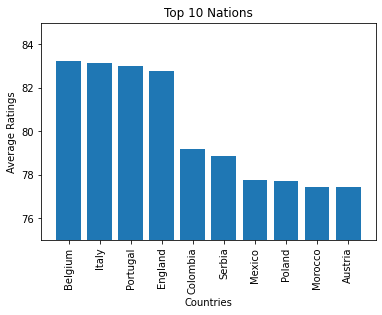

In [214]:
# top 10 national teams 
# things to consider: 
# (i) A national team is made up of 23 players, so we should exclude countries that have fewer than 23 players  
# (ii) Calculate the average ratings of the top 23 players by each country to compare national team strength
available_countries = df['nationality'].unique()[df.groupby('nationality')['overall'].count() >= 23]
ratings = []
for country in available_countries:
  top23 = df[df['nationality']==country].head(23)
  average_ratings = top23.overall.mean()
  ratings.append(average_ratings)
df2 = pd.DataFrame({"nationality" : available_countries, "mean_ratings" : ratings})
top10_nations = df2.sort_values('mean_ratings', ascending=False).head(10)
print(top10_nations)

plt.bar(top10_nations.nationality, top10_nations.mean_ratings)
plt.xlabel('Countries')
plt.ylabel('Average Ratings')
plt.title('Top 10 Nations')
plt.ylim(75,85)
plt.xticks(rotation=90)
plt.show()



In [232]:
# perform a linear regression of a player's potential on age, controlling for his current overall ability
import statsmodels.api as sm

# this is the way I learned in my MATH-408 class to perform a multi-linear regression
def multi_lin_least_squares_parameters(X, Y):
    X = sm.add_constant(X).values
    Y = Y.values
    if np.linalg.det(np.matmul(X.transpose(),X))==0:
        return print('Data matrix is not invertible')
    else:
        return np.matmul(np.linalg.inv(np.matmul(X.transpose(),X)), np.matmul(X.transpose(),Y))

def multi_lin_best_fit_plane(X,Y):
    import statsmodels.api as sm
    X = sm.add_constant(X)
    params = multi_lin_least_squares_parameters(X,Y)
    Y_hat = np.matmul(X.values, params)
    return Y_hat

x = df[['age', 'overall']]
y = df['potential']

# coefficients of estimators
params = multi_lin_least_squares_parameters(x, y)
params

array([36.05873445, -0.8790947 ,  0.87417528])

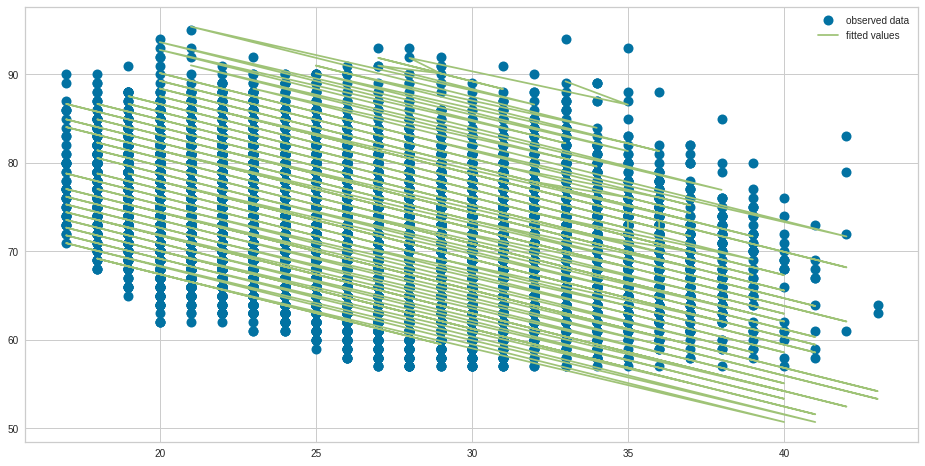

In [234]:
plt.figure(figsize=(16,8))

plt.plot(df['age'], y, '.', ms='20',label='observed data')
plt.plot(df['age'], multi_lin_best_fit_plane(x, y), label='fitted values')
plt.legend();

In [235]:
from sklearn.metrics import r2_score

# look at the R^2
r2_score(y, multi_lin_best_fit_plane(x, y))


0.8067360859877828

## **Final Deliverable**

Your final submission should consist of captioned visualizations detailing your most important insights. You will also work on writing and posting a blog to medium or your github website. Your “insights” can include important surprises or issues (such as data quality problems affecting your analysis) as well as responses to your analysis questions.

Each visualization image should be a screenshot accompanied with a title and descriptive caption (1-4 sentences long) describing the insight(s) learned from that view. Provide sufficient detail for each caption such that anyone could read through your report and understand what you’ve learned. You are free, but not required, to annotate your images to draw attention to specific features of the data. 

Do not submit a blog cluttered with everything little thing you tried. Submit a clean report that highlights the most important “milestones” in your exploration, which can include initial overviews, identification of data quality problems, confirmations of key assumptions, and potential “discoveries”. Your blog should only present the final dataset you analyzed and should not describe any iterations on earlier datasets you might have initially explored.

## **Data Sources**

There are a variety of data sources available online. Here are some possible sources to consider. If you have any questions about whether your dataset is appropriate, please talk to the TAs.

**Data is Plural** - Variety of datasets and sources covering many topics.

https://data.gov - U.S. Government open datasets.

U.S. Census Bureau - Census data - https://data.census.gov/

Federal Elections Commission - Campaign finance and expenditures. - https://www.fec.gov/data/

Federal Aviation Administration - FAA data - https://www.faa.gov/data_research/

https://www.kaggle.com/

https://archive.ics.uci.edu/ml/index.php

https://github.com/awesomedata/awesome-public-datasets - Awesome Public Datasets - Variety of public datasets.

Stanford Cable TV News Analyzer - We have recently released a tool that can be used to analyze who and what appears in the last decade of Cable TV News (i.e. CNN, Fox News, MSNBC). The site lets you download data as well which you could use to conduct further analysis. - https://tvnews.stanford.edu/data

### **Visualization Tool (matplotlib, seaborn, etc)**

One goal of this assignment is for you to learn to use and evaluate the effectiveness of these packages. In addition to these packages, you are free to also use other visualization tools as you see fit, for example, you could also take a look at Tableau.

### **Data Wrangling Tools**

The data you choose may require reformatting, transformation or cleaning prior to visualization. You can use Pandas for data preparation. 

### **Grading**

Each submission will be graded based on both the analysis process and the included visualizations. Here are our grading criteria:

**Appropriate Data Assessment (5):** Overview/understanding of the data is built from transformations and appropriate assessment of data quality. Poses clear questions.

**Exploration Thoroughness (5):** Sufficient breadth of analysis, exploring questions in sufficient depth (with appropriate follow-up questions).

**Documentation (Blog) (5):** Clear documentation of exploratory process, including clearly written, understandable captions that communicate primary insights.

**Appropriate use of Numpy, Pandas, and Matplotlib (5)**  to ingest, clean, and present the data

### **Submission Details**

This is an individual assignment. You may not work in groups. The assignment is due on Sunday (03/07/2021)

To submit your assignment, download your notebook and zip all the necessary files(data files). Submit the zipped file to balckboard. Make sure the notebook and the zipped file is named in the format - EDA_LastName_FirstName. Be sure to include the link to access your blog in your notebook.

Also include the link to your notebook in the submission. 

We will provide more details on the blog during the next week of class.

**Note** - If the dataset is too large to be zipped and submitted on blackboard, only submit your notebook, add your dataset to your google drive and share a link to the file in your notebook.